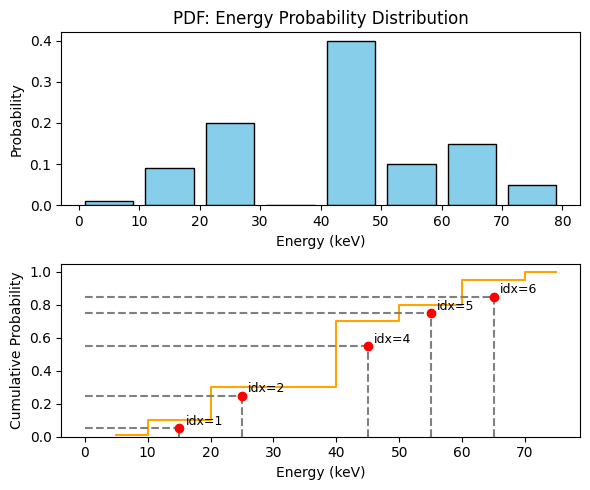

随机数 u: [0.05 0.75 0.25 0.55 0.85]
cdf: [0.01 0.1  0.3  0.3  0.7  0.8  0.95 1.  ]
对应索引 idx: [1 5 2 4 6]
对应能量 bin centers: [15. 55. 25. 45. 65.]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ==== 假设的能量 bins 与对应概率 ====
bins = np.array([0,   10,   20,  30, 40,  50,    60,   70, 80])  # keV
pdf = np.array([0.01, 0.09, 0.2, 0,  0.4, 0.1, 0.15, 0.05])  # 每个区间的相对概率

# 归一化
pdf = pdf / pdf.sum()

# 计算累积分布函数（CDF）
cdf = np.cumsum(pdf)
bin_centers = (bins[:-1] + bins[1:]) / 2

# ==== 画图 ====
fig, ax = plt.subplots(2, 1, figsize=(6, 5))

# 上图：PDF（概率密度）
ax[0].bar(bin_centers, pdf, width=8, color='skyblue', edgecolor='k')
ax[0].set_title('PDF: Energy Probability Distribution')
ax[0].set_xlabel('Energy (keV)')
ax[0].set_ylabel('Probability')

# 下图：CDF（累积分布函数）
ax[1].step(bin_centers, cdf, where='mid', color='orange', label='CDF')
ax[1].set_xlabel('Energy (keV)')
ax[1].set_ylabel('Cumulative Probability')
ax[1].set_ylim(0, 1.05)

# 示意几个随机数 u
u = np.array([0.05, 0.75, 0.25, 0.55, 0.85])
idx = np.searchsorted(cdf, u)

# 在CDF图上画出这些随机数与对应能量区间
for ui, i in zip(u, idx):
    ax[1].hlines(ui, 0, bin_centers[i], color='gray', linestyle='--')
    ax[1].vlines(bin_centers[i], 0, ui, color='gray', linestyle='--')
    ax[1].plot(bin_centers[i], ui, 'ro')
    ax[1].text(bin_centers[i]+1, ui+0.02, f'idx={i}', fontsize=9)

plt.tight_layout()
plt.show()

print("随机数 u:", u)
print("cdf:", cdf)
print("对应索引 idx:", idx)
print("对应能量 bin centers:", bin_centers[idx])


In [12]:
# import numpy as np
# import matplotlib.pyplot as plt
 

# def add_gaussian_pulse(signal, t0, amplitude, fwhm, dt):
#     """
#     在 signal 上叠加一个以 t0 为中心的高斯脉冲。
#     参数:
#     --------
#     signal : np.ndarray
#         要叠加的目标信号数组（原地修改）
#     t0 : float
#         脉冲中心时间 (s)
#     amplitude : float
#         脉冲峰值幅度（高斯峰值）
#     fwhm : float
#         脉冲全宽半高 (Full Width at Half Maximum, s)
#     dt : float
#         采样时间步长 (s)
#     """
#     # FWHM 转换为 sigma
#     sigma = fwhm / (2.0 * np.sqrt(2.0 * np.log(2.0)))

#     # 取 ±3σ 的高斯窗口（超过这个范围的值可以忽略）
#     half = int(np.ceil(3.0 * sigma / dt))
#     tw = (np.arange(-half, half + 1) * dt)

#     # 峰值归一化（最大值=1），面积随 σ 改变
#     g = np.exp(-0.5 * (tw / sigma) ** 2)

#     # 找到中心索引并写入信号
#     ic = int(round(t0 / dt))
#     i0, i1 = ic - half, ic + half + 1
#     j0, j1 = max(0, i0), min(len(signal), i1)
#     if j0 < j1:
#         gj0 = j0 - i0
#         gj1 = gj0 + (j1 - j0)
#         signal[j0:j1] += amplitude * g[gj0:gj1]


# def generate_signal(spectrum_bins, spectrum_pdf, rate, T_total=400e-6,
#                     pulse_width=25e-9, dt=1e-9, gain=1.0,
#                     pulse_shape='rect',          # 'rect' 或 'gauss'
#                     ):
#     """"
#     | 参数        | 含义                                                  | 典型值          
#     -----------   | -----------------------------------------------------  
#     spectrum_bins | 能谱的能量区间(单位 keV),例如 [0, 1, 2, ..., 100]      | 实验能谱能量边界       
#     spectrum_pdf  | 每个能量区间对应的概率或强度(未必归一化)                | 来自实验或模拟的能谱     
#     rat           | 入射光子计数率(单位:counts/s)                          | 1e5 ~ 1e7     
#     T_total       | 采样积分总时间(秒)                                     | 400e-6 (400 μs)   
#     pulse_width   | 每个脉冲宽度(秒)                                       | 25e-9 (25 ns) 
#     dt            | 采样时间步长(秒)                                       | 1e-9 (1 ns)   
#     gain          | 幅度放大系数，用于将能量转成信号幅度                    | 可设 1.0       
#     """
#     # 归一化谱
#     pdf = spectrum_pdf / np.sum(spectrum_pdf)
#     # pdf = spectrum_pdf
#     cdf = np.cumsum(pdf)
#     bin_centers = (spectrum_bins[:-1] + spectrum_bins[1:]) / 2
 

#     # 泊松过程生成到达时间
#     t, times = 0.0, []      # t 表示当前的时间; times 保存每个光子事件的到达时刻。
#     # 循环执行， 得到从 0 到 T_total 内所有的随机到达时间。
#     while t < T_total:
#         # “模拟一次新的光子到达” → “时间向前跳一个随机的间隔 Δt”。
#         # np.random.exponential(1.0 / rate) 为一个随机时间间隔 Δt
#         t += np.random.exponential(1.0 / rate)  # rate 光子到达的平均时间间隔
#         if t < T_total:
#             times.append(t)
#     times = np.array(times)
 

#     # 根据谱抽样能量
#     u = np.random.rand(len(times))  # 随机均匀地抽取 N 个光子，赋予一个随机数，这些随机数在0-1之间
#     idx = np.searchsorted(cdf, u)   # 


#     # energies = bin_centers[np.clip(idx, 0, len(bin_centers) - 1)]
#     # amplitudes = gain * energies
#     # 假设你有 bin_edges 和为每个事件找到的 bin 索引 idx            # second method  
#     left  = spectrum_bins[idx]                                    # second method
#     right = spectrum_bins[idx + 1]                                # second method
#     energies = left + np.random.rand(len(idx)) * (right - left)  # second method # 在区间内均匀抽样
#     amplitudes = gain * energies                                  # second method    


#     # 生成时间轴与信号
#     t_axis = np.arange(0, T_total, dt)
#     signal = np.zeros_like(t_axis)

#     # pulse_samples = int(pulse_width / dt)   # 每个脉冲持续 25 个采样时间点
#     # for ti, Ai in zip(times, amplitudes):
#     #     i0 = int(ti / dt)
#     #     i1 = min(i0 + pulse_samples, len(signal))
#     #     signal[i0:i1] += Ai


#     if pulse_shape == 'rect':
#         pulse_samples = max(1, int(round(pulse_width / dt)))
#         for ti, Ai in zip(times, amplitudes):
#             i0 = int(ti / dt)
#             i1 = min(i0 + pulse_samples, len(signal))
#             if i0 < len(signal):
#                 signal[i0:i1] += Ai

#     elif pulse_shape == 'gauss':
#         for ti, Ai in zip(times, amplitudes):
#             add_gaussian_pulse(signal, ti, Ai, pulse_width, dt)
#     else:
#         raise ValueError("pulse_shape must be 'rect' or 'gauss'.")




#     return t_axis, signal, times, amplitudes


In [ ]:
from poisson_signal_generator_utils import generate_signal

## 待做：找一找 asci 本底噪声电子噪声的信号波形，来做模拟


# ---------- 读取谱文件 spek_120.txt ---------- 
data = np.loadtxt('spectrum_file/spek_120.txt', skiprows=1)   # 或 np.loadtxt('spek_120.txt', skiprows=1)
energies = data[:,0]                    # 能量点，单位 keV (应该从 12 到 120)
values = data[:,1]                      # 对应强度（任意单位）

# ---------------- 构建 bins 和 pdf ---------------- 
emin = energies.min() - 0.5     # 将 bin edges 设为以 0.5 keV 为半宽度的等间隔边界
emax = energies.max() + 0.5
bins = np.arange(emin, emax + 1e-6, 1.0)   # edges every 1 keV
 

# 使用读取的 values 作为谱强度（pdf 需要归一化）
pdf = values.copy()
pdf = pdf / np.sum(pdf) 


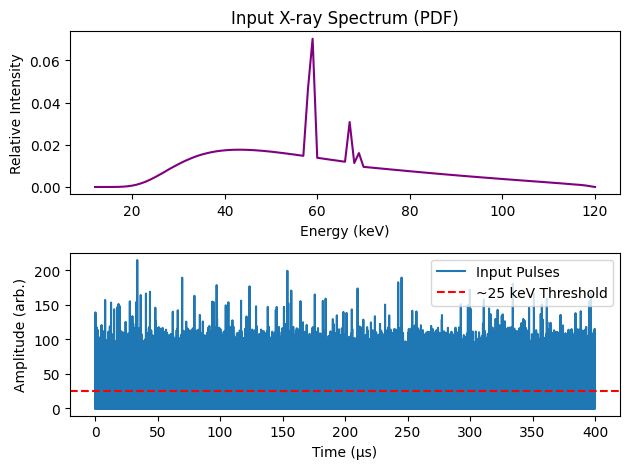

In [14]:

# 示例：虚拟谱（两个峰）
# bins = np.linspace(0, 100, 101)
# pdf = 0.7*np.exp(-(bins[:-1]-30)**2/(2*3**2)) + 0.3*np.exp(-(bins[:-1]-70)**2/(2*2**2))

# 入射率 1e6 cps
t, sig, times, amps = generate_signal(bins, pdf, rate=3.480e+07, T_total=400e-6,
                                      pulse_width=1e-9, dt=1e-9, gain=1.0,
                                      pulse_shape='gauss',)

# (1) 光谱（能量分布）
plt.subplot(2,1,1)
plt.plot((bins[:-1] + bins[1:]) / 2, pdf, color='purple')
plt.xlabel('Energy (keV)')
plt.ylabel('Relative Intensity')
plt.title('Input X-ray Spectrum (PDF)')

# (2) 时间波形
plt.subplot(2,1,2)
plt.plot(t*1e6, sig, label='Input Pulses')
plt.axhline(25, color='r', linestyle='--', label='~25 keV Threshold')
plt.xlabel('Time (μs)')
plt.ylabel('Amplitude (arb.)')
plt.legend()
plt.tight_layout()
plt.show()


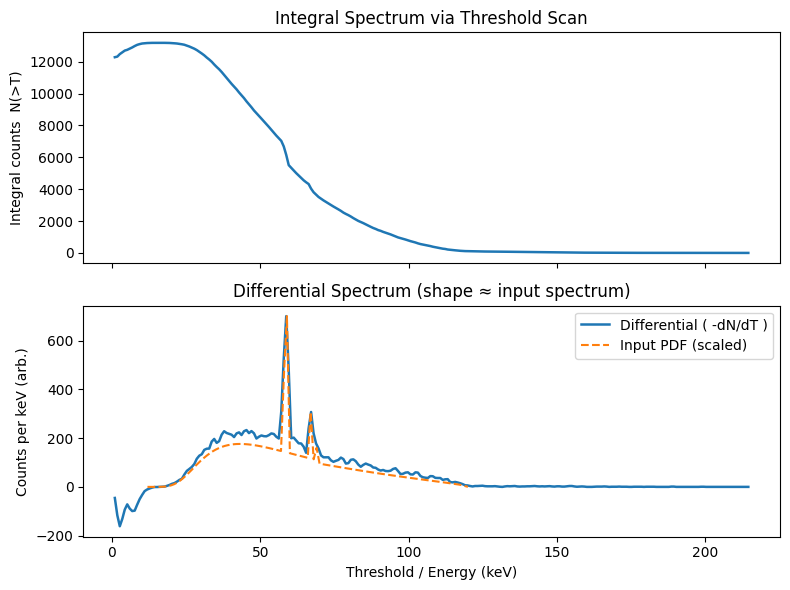

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from poisson_signal_generator_utils import count_crossings

# --- 阈值扫描参数 ---
dt = t[1] - t[0]                   # 采样间隔
thr_min = 1.0
# thr_max = 257
thr_max = sig.max() #* 1.05
n_thr   = 256                      # 阈值点数（可调）
thr_vals = np.linspace(thr_min, thr_max, n_thr)



# --- 扫描阈值，得到积分谱 N(>T) ---
integral_counts = np.array([count_crossings(sig, thr) for thr in thr_vals])

# --- 微分谱：对积分谱随阈值做负梯度 ---
# 用梯度近似 -dN/dT（注意单位 ~ counts/幅度）
differential = -np.gradient(integral_counts, thr_vals)

# 如果你的 gain=1，那么“幅度=能量(keV)”；否则这里可做 thr_vals/gain 的能量轴换算
energy_axis = thr_vals  # keV（在你的 generate_signal 里 gain=1.0）

# --- 画图：积分谱 & 微分谱（与输入pdf作形状对比）---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# 积分谱（阈值越高，计数越少）
ax1.plot(energy_axis, integral_counts, lw=1.8)
ax1.set_ylabel('Integral counts  N(>T)')
ax1.set_title('Integral Spectrum via Threshold Scan')

# 微分谱（应近似输入能谱形状；仅差一个尺度因子）
ax2.plot(energy_axis, differential, lw=1.8, label='Differential ( -dN/dT )')

# 可选：把输入 pdf 归一后缩放到可见范围作对比（仅形状对比）
# 这里简单按最大值对齐
orig_centers = (bins[:-1] + bins[1:]) / 2
pdf_norm = pdf / pdf.max() * differential.max() if differential.max() > 0 else pdf
ax2.plot(orig_centers, pdf_norm , '--', label='Input PDF (scaled)')

ax2.set_xlabel('Threshold / Energy (keV)')
ax2.set_ylabel('Counts per keV (arb.)')
ax2.set_title('Differential Spectrum (shape ≈ input spectrum)')
ax2.legend()
plt.tight_layout()
plt.show()


In [16]:
import numpy as np

# energies: 形如 [12,13,...,120] keV 的中心点
# values:   同长度的 N_i，单位 [keV·cm^2·mAs]^-1 @ 1 m
# 示例：energies, values = load_spectrum('spek_120.txt')  # 你前面已经有

# 1) 构造能量 bin 边界与步长
if np.allclose(np.diff(energies), energies[1]-energies[0]):
    dE = np.diff(np.concatenate([energies, [energies[-1] + (energies[1]-energies[0])]]))
else:
    # 不等间隔：用相邻中心点做边界
    mid = (energies[:-1] + energies[1:]) / 2
    edges = np.empty(len(energies) + 1)
    edges[1:-1] = mid
    edges[0] = energies[0] - (mid[0] - energies[0])
    edges[-1] = energies[-1] + (energies[-1] - mid[-1])
    dE = np.diff(edges)

# 2) 物理参数（按需要替换）
I_mA   = 20.0           # 管电流 mA（连续透视时）
r_m    = 0.40           # 源到探测器距离（m）
A_cm2  = 340e-4*340e-4     # 例如单像素 0.5 mm × 0.5 mm = 0.05 cm × 0.05 cm
eta    = np.ones_like(values)  # 暂时不考虑效率时取 1

# 3) 计算入射计数率 λ（counts/s）
rate = np.sum(values * dE * I_mA * (1.0/r_m)**2 * A_cm2 * eta)

# 4) 生成 pdf（只要形状）
pdf = values * dE
pdf = pdf / pdf.sum()

# 5) 构造 bins（边界）传给 generate_signal
# 若 energies 是中心点：
bin_edges = np.empty(len(energies) + 1)
bin_edges[1:-1] = (energies[:-1] + energies[1:]) / 2
bin_edges[0] = energies[0] - (bin_edges[1] - energies[0])
bin_edges[-1] = energies[-1] + (energies[-1] - bin_edges[-2])

# 6) 调用你的生成函数
t, sig, times, amps = generate_signal(
    spectrum_bins=bin_edges,
    spectrum_pdf=pdf,
    rate=rate,                 # 这里就是“真实计数率/像素”
    T_total=400e-6,
    pulse_width=25e-9,
    dt=1e-9,
    gain=1.0
)

print(f"Computed rate = {rate:.3e} cps")
print(f"Generated {len(times)} events in {400e-6:.2e} s (observed ~ {len(times)/(400e-6):.3e} cps)")


Computed rate = 3.480e+07 cps
Generated 13960 events in 4.00e-04 s (observed ~ 3.490e+07 cps)
